# Day 22: Confusion Matrix, Precision, Recall, F1-score 📊

### Objective:
Understand **classification metrics** for evaluating ML models.

- **Confusion Matrix**: Table showing correct and incorrect predictions.
- **Precision**: How many predicted positives are actually positive.  
- **Recall (Sensitivity)**: How many actual positives were correctly predicted.  
- **F1-score**: Harmonic mean of precision and recall.

### Metrics Definitions:

| Metric      | Formula |
|------------|---------|
| Accuracy    | (TP + TN) / (TP + TN + FP + FN) |
| Precision  | TP / (TP + FP) |
| Recall     | TP / (TP + FN) |
| F1-score   | 2 * (Precision * Recall) / (Precision + Recall) |

Where:  
- TP = True Positive  
- TN = True Negative  
- FP = False Positive  
- FN = False Negative


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer


## Load SMS Spam Dataset


In [2]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label','message'])

# Basic preprocessing
import string
df['message_clean'] = df['message'].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))


## Feature Extraction & Train-Test Split


In [3]:
cv = CountVectorizer()
X = cv.fit_transform(df['message_clean'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Train Naive Bayes Classifier


In [4]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## Confusion Matrix


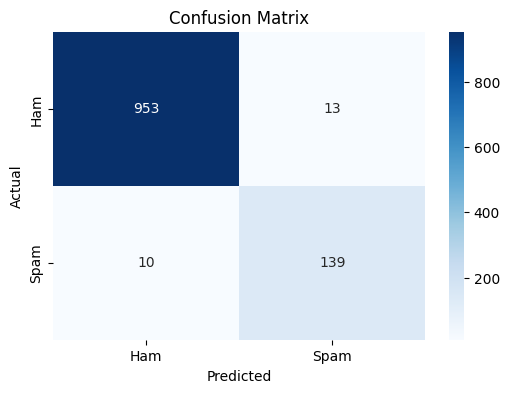

In [5]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Classification Report (Precision, Recall, F1-score)


In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.979372197309417

Classification Report:

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.91      0.93      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Manual Calculation Example


In [7]:
# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f"TP={tp}, TN={tn}, FP={fp}, FN={fn}")

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"\nManual Calculations:\nAccuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1-score={f1:.2f}")


TP=139, TN=953, FP=13, FN=10

Manual Calculations:
Accuracy=0.98, Precision=0.91, Recall=0.93, F1-score=0.92


### 🔑 Key Takeaways:
- Confusion matrix gives a clear **visual of model performance**.
- **Precision vs Recall** trade-off: high precision → fewer false positives, high recall → fewer false negatives.
- F1-score balances precision and recall.
- Always consider multiple metrics, not just accuracy, especially for **imbalanced datasets**.
